In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbodykit.lab import *
from nbodykit import setup_logging, style
plt.style.use(style.notebook)
import h5py

from pmesh.pm import ParticleMesh, RealField, ComplexField

from nbodykit.source.catalog import ArrayCatalog
from nbodykit.source.catalog import HDFCatalog
from nbodykit.lab import ArrayMesh

/opt/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from astropy.cosmology import Planck18 as cosmo

In [3]:
def read_dat_file(file_path):
    # Assuming the data in the .dat file is space-separated
    data = np.loadtxt(file_path)
    return data

def read_h5_file(file_path, dataset_name):
    with h5py.File(file_path, 'r') as file:
        dataset = file[dataset_name]
        data = np.array(dataset)
    return data

In [4]:
class_data =[]
for i in [30, 10, 3, 0]:
    data = read_dat_file('/Users/Io_1/Desktop/gevolution/classdata/classdata' + str(i)+ '.dat')
    class_data.append(data)

Plotting data at fixed tiling factor (32) and ngrid, changing boxsize. Resolution is changing, so is nyquist frequency. K-values reflect that.

In [5]:
def data_getter(x):
    d400 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputbox/output400/lcdm_pk00' + str(x)+'_delta.dat')
    d800 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputbox/output800/lcdm_pk00' + str(x)+'_delta.dat')
    d1600 =read_dat_file('/Users/Io_1/Desktop/gevolution/outputbox/output1600/lcdm_pk00' + str(x)+'_delta.dat')
    return d400, d800, d1600

num_files = 4
delta400 = []
delta800 = []
delta1600 = []

for i in range(num_files):
    d400, d800, d1600,  = data_getter(i)
    delta400.append(d400)
    delta800.append(d800)
    delta1600.append(d1600)

part_info2000 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputbox/output400/lcdm_snap001_cdm.h5', 'part_info')
part_info4000 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputbox/output800/lcdm_snap001_cdm.h5', 'part_info')
part_info8000 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputbox/output1600/lcdm_snap001_cdm.h5', 'part_info')

print(part_info2000, part_info4000, part_info8000)

[(1.48795166e-07, 0, 11052, b'part_simple')] [(1.48795166e-07, 0, 11177, b'part_simple')] [(1.48795166e-07, 0, 11051, b'part_simple')]


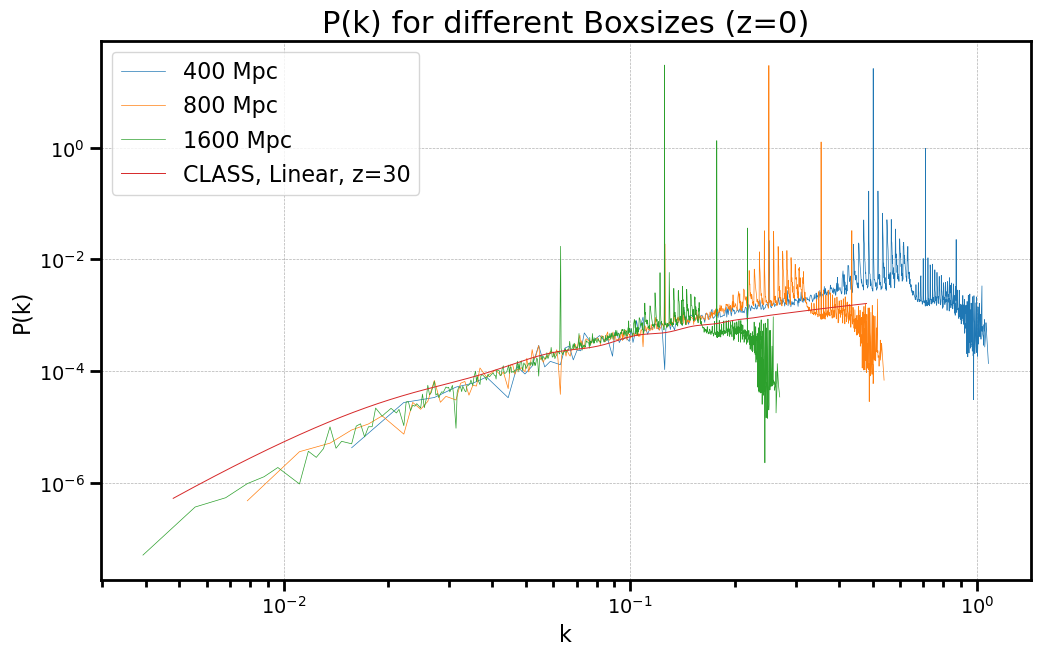

In [6]:
plt.loglog(delta400[0][:, 0], delta400[0][:, 1], label='400 Mpc', linewidth=0.5)
#plt.loglog(delta400[1][:, 0], delta400[1][:, 1], label='400, z=10', linewidth=0.5)
#plt.loglog(delta400[2][:, 0], delta400[2][:, 1], label='400, z=3', linewidth=0.5)
#plt.loglog(delta400[3][:, 0], delta400[3][:, 1], label='400, z=0', linewidth=0.5)
plt.loglog(delta800[0][:, 0], delta800[0][:, 1], label='800 Mpc', linewidth=0.5)
#plt.loglog(delta800[1][:, 0], delta800[1][:, 1], label='800, z=30', linewidth=0.5)
#plt.loglog(delta800[2][:, 0], delta800[2][:, 1], label='800, z=10', linewidth=0.5)
#plt.loglog(delta800[3][:, 0], delta800[3][:, 1], label='800, z=3', linewidth=0.5)
plt.loglog(delta1600[0][:, 0], delta1600[0][:, 1], label='1600 Mpc', linewidth=0.5)
#plt.loglog(delta1600[1][:, 0], delta1600[1][:, 1], label='1600, z=30', linewidth=0.5)
#plt.loglog(delta1600[2][:, 0], delta1600[2][:, 1], label='1600, z=10', linewidth=0.5)
#plt.loglog(delta1600[3][:, 0], delta1600[3][:, 1], label='1600, z=3', linewidth=0.5)

plt.loglog(class_data[0][0,:], (1/(2*np.pi**2))*class_data[0][0,:]**3*class_data[0][1,:], linewidth=0.7, label='CLASS, Linear, z=30')

#plt.vlines(x=np.pi*120/2000, ymin=10e-7, ymax =10e3, label='nyquist2000', colors='blue')
#plt.vlines(x=np.pi*120/4000, ymin=10e-7, ymax =10e3, label='nyquist4000', colors='purple')
#plt.vlines(x=np.pi*120/8000, ymin=10e-7, ymax =10e3, label='nyquist8000', colors='red')

plt.title('P(k) for different Boxsizes (z=0)')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend()

For these I keep the resolution the same for all 3 simulations, but do not change the tiling factor.

In [7]:
def data_getter(x):
    d400 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputres/output400/lcdm_pk00' + str(x)+'_delta.dat')
    d800 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputres/output800/lcdm_pk00' + str(x)+'_delta.dat')
    d1600 =read_dat_file('/Users/Io_1/Desktop/gevolution/outputres/output1600/lcdm_pk00' + str(x)+'_delta.dat')
    d2000 =read_dat_file('/Users/Io_1/Desktop/gevolution/outputres/output2000/lcdm_pk00' + str(x)+'_delta.dat')
    return d400, d800, d1600, d2000

num_files = 4
resdelta400 = []
resdelta800 = []
resdelta1600 = []
resdelta2000 = []

for i in range(num_files):
    d400, d800, d1600, d2000 = data_getter(i)
    resdelta400.append(d400)
    resdelta800.append(d800)
    resdelta1600.append(d1600)
    resdelta2000.append(d2000)

part_info400 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputres/output400/lcdm_snap001_cdm.h5', 'part_info')
part_info800 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputres/output800/lcdm_snap001_cdm.h5', 'part_info')
part_info1600 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputres/output1600/lcdm_snap001_cdm.h5', 'part_info')
part_info2000 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputres/output2000/lcdm_snap001_cdm.h5', 'part_info')

print(part_info400, part_info800, part_info1600, part_info2000)

[(1.48795166e-07, 0, 10923, b'part_simple')] [(1.48795166e-07, 0, 10922, b'part_simple')] [(1.48795166e-07, 0, 10926, b'part_simple')] [(1.48795166e-07, 0, 10980, b'part_simple')]


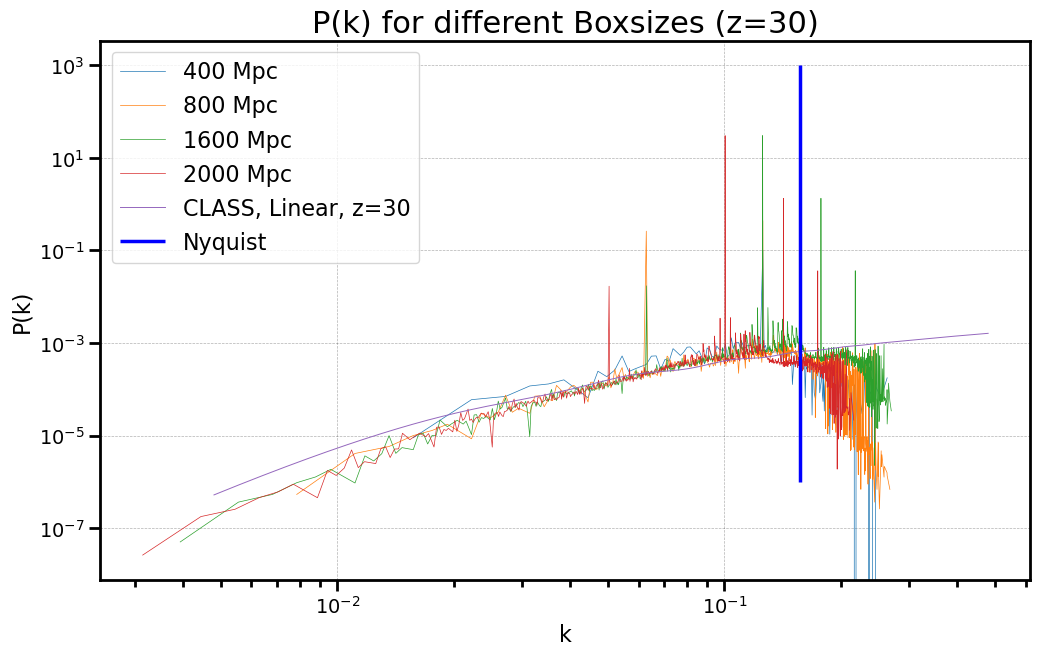

In [8]:
plt.loglog(resdelta400[0][:, 0], resdelta400[0][:, 1], label='400 Mpc', linewidth=0.5)
#plt.loglog(resdelta400[1][:, 0], resdelta400[1][:, 1], label='400, z=10', linewidth=0.5)
#plt.loglog(resdelta400[2][:, 0], resdelta400[2][:, 1], label='400, z=3', linewidth=0.5)
#plt.loglog(resdelta400[3][:, 0], resdelta400[3][:, 1], label='400, z=0', linewidth=0.5)
plt.loglog(resdelta800[0][:, 0], resdelta800[0][:, 1], label='800 Mpc', linewidth=0.5)
#plt.loglog(resdelta800[1][:, 0], resdelta800[1][:, 1], label='800, z=30', linewidth=0.5)
#plt.loglog(resdelta800[2][:, 0], resdelta800[2][:, 1], label='800, z=10', linewidth=0.5)
#plt.loglog(resdelta800[3][:, 0], resdelta800[3][:, 1], label='800, z=3', linewidth=0.5)
plt.loglog(resdelta1600[0][:, 0],resdelta1600[0][:, 1], label='1600 Mpc', linewidth=0.5)
#plt.loglog(resdelta1600[1][:, 0],resdelta1600[1][:, 1], label='1600, z=30', linewidth=0.5)
#plt.loglog(resdelta1600[2][:, 0],resdelta1600[2][:, 1], label='1600, z=10', linewidth=0.5)
#plt.loglog(resdelta1600[3][:, 0],resdelta1600[3][:, 1], label='1600, z=3', linewidth=0.5)
plt.loglog(resdelta2000[0][:, 0],resdelta2000[0][:, 1], label='2000 Mpc', linewidth=0.5)

plt.loglog(class_data[0][0,:], (1/(2*np.pi**2))*class_data[0][0,:]**3*class_data[0][1,:], linewidth=0.7, label='CLASS, Linear, z=30')

plt.vlines(x=np.pi*80/1600, ymin=10e-7, ymax =10e2, label='Nyquist', colors='blue')

plt.title('P(k) for different Boxsizes (z=30)')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend()

This is weird because a few days ago I was working with a sim with pretty close parameters and got a very different looking spectrum (blue line). Subsequently I tried plotting a variety of parameters to see where it fails. 

In [9]:
def data_getter(x):
    d2000 = read_dat_file('/Users/Io_1/Desktop/gevolution/output2000/lcdm_pk00' + str(x)+'_delta.dat')
    d200032 = read_dat_file('/Users/Io_1/Desktop/gevolution/output32/lcdm_pk00' + str(x)+'_delta.dat')
    d12032 = read_dat_file('/Users/Io_1/Desktop/gevolution/output200032/lcdm_pk00' + str(x)+'_delta.dat')
    d20001 = read_dat_file('/Users/Io_1/Desktop/gevolution/output104/output2000/lcdm_pk00' + str(x)+'_delta.dat')
    return d2000, d200032, d12032, d20001

def snap_getter(x):
    d2000 = read_h5_file('/Users/Io_1/Desktop/gevolution/output2000/lcdm_snap00' + str(x)+'_phi.h5', 'data')
    d200032 = read_h5_file('/Users/Io_1/Desktop/gevolution/output32/lcdm_snap00' + str(x)+'_phi.h5', 'data')
    d12032 = read_h5_file('/Users/Io_1/Desktop/gevolution/output200032/lcdm_snap00' + str(x)+'_phi.h5', 'data')
    d20001 = read_h5_file('/Users/Io_1/Desktop/gevolution/output104/output2000/lcdm_snap00' + str(x)+'_phi.h5', 'data')
    d80 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputres/output2000/lcdm_snap001_phi.h5', 'data')
    return d2000, d200032, d12032, d20001,d80

num_files = 4
delta2000 = []
delta20001 = []
delta200032 = []
delta12032 = []
snap2000 = []
snap20001 = []
snap200032 = []
snap12032 = []
snap80 =[]

for i in range(num_files):
    d2000, d200032, d12032, d20001 = data_getter(i)
    delta2000.append(d2000)
    delta200032.append(d200032)
    delta20001.append(d20001)
    delta12032.append(d12032)

for i in range(num_files):
    d2000, d200032, d12032, d20001,d80 = snap_getter(i)
    snap2000.append(d2000)
    snap200032.append(d200032)
    snap20001.append(d20001)
    snap12032.append(d12032)
    snap80.append(d80)

part_info120_16 = read_h5_file('/Users/Io_1/Desktop/gevolution/output2000/lcdm_snap001_cdm.h5', 'part_info')
part_info104_24 = read_h5_file('/Users/Io_1/Desktop/gevolution/output104/output2000/lcdm_snap001_cdm.h5', 'part_info')
part_info104_32 = read_h5_file('/Users/Io_1/Desktop/gevolution/output200032/lcdm_snap001_cdm.h5', 'part_info')
part_info80_32 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputres/output2000/lcdm_snap001_cdm.h5', 'part_info')

print(part_info120_16, part_info104_24, part_info104_32, part_info80_32)

[(1.19036133e-06, 0, 11178, b'part_simple')] [(3.52699653e-07, 0, 11056, b'part_simple')] [(1.48795166e-07, 0, 10974, b'part_simple')] [(1.48795166e-07, 0, 10980, b'part_simple')]


Text(0.5, 1.0, '2000 Mpc box with different parameters (z=30)')

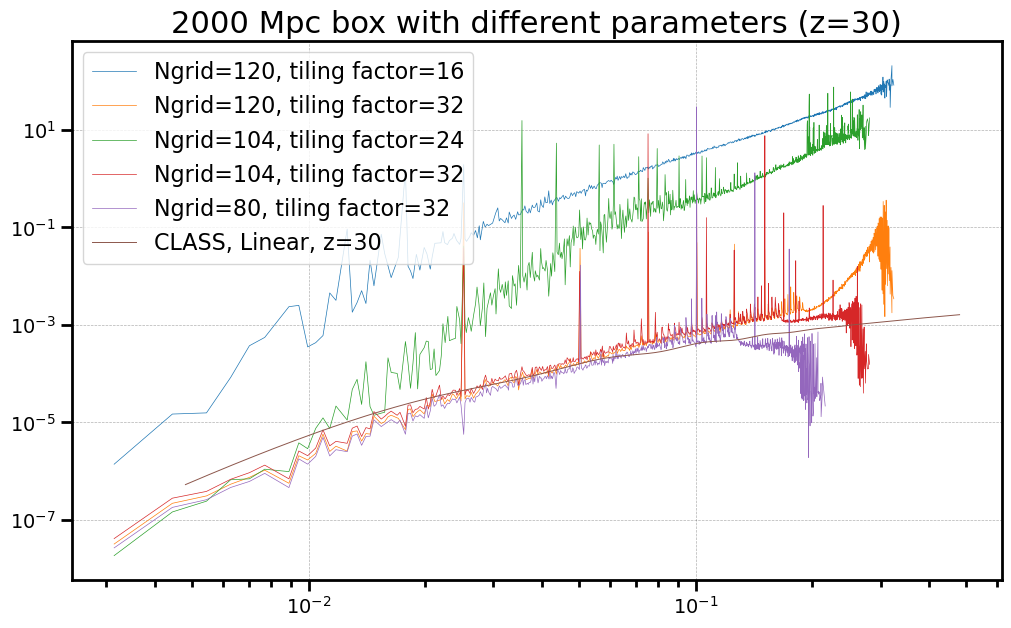

In [10]:
plt.loglog(delta2000[0][:, 0], delta2000[0][:, 1], label='Ngrid=120, tiling factor=16', linewidth=0.5)
plt.loglog(delta12032[0][:, 0], delta12032[0][:, 1], label='Ngrid=120, tiling factor=32', linewidth=0.5)
plt.loglog(delta20001[0][:, 0], delta20001[0][:, 1], label='Ngrid=104, tiling factor=24', linewidth=0.5)
plt.loglog(delta200032[0][:, 0], delta200032[0][:, 1], label='Ngrid=104, tiling factor=32', linewidth=0.5)
plt.loglog(resdelta2000[0][:, 0],resdelta2000[0][:, 1], label='Ngrid=80, tiling factor=32', linewidth=0.5)
plt.loglog(class_data[0][0,:], (1/(2*np.pi**2))*class_data[0][0,:]**3*class_data[0][1,:], linewidth=0.7, label='CLASS, Linear, z=30')

plt.legend()
plt.title('2000 Mpc box with different parameters (z=30)')

Is this reflected in what the field snapshots look like? 

I think the spikes can be explained by the grid length scales, and yes, it does seem like a smaller tiling factor produces more small clumps. 

Text(0.5, 1.0, 'Ngrid=80, tiling factor=32')

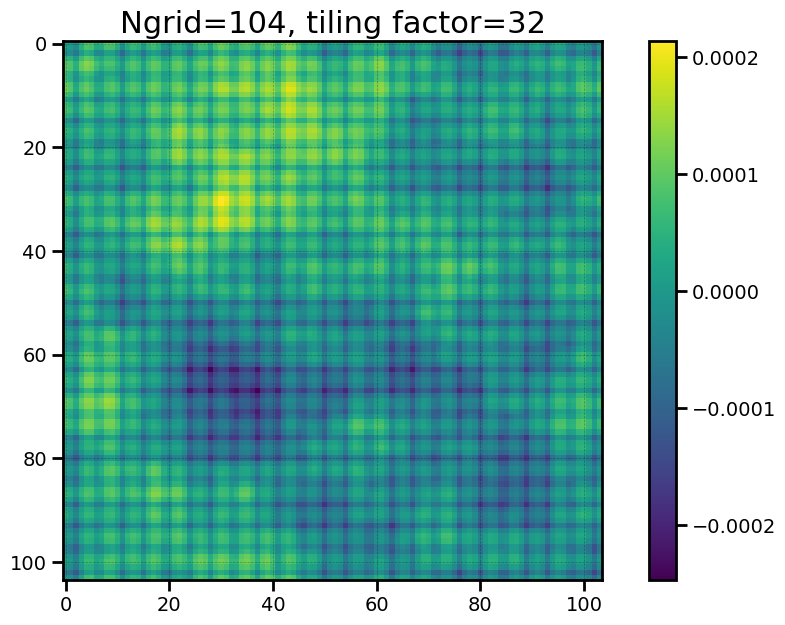

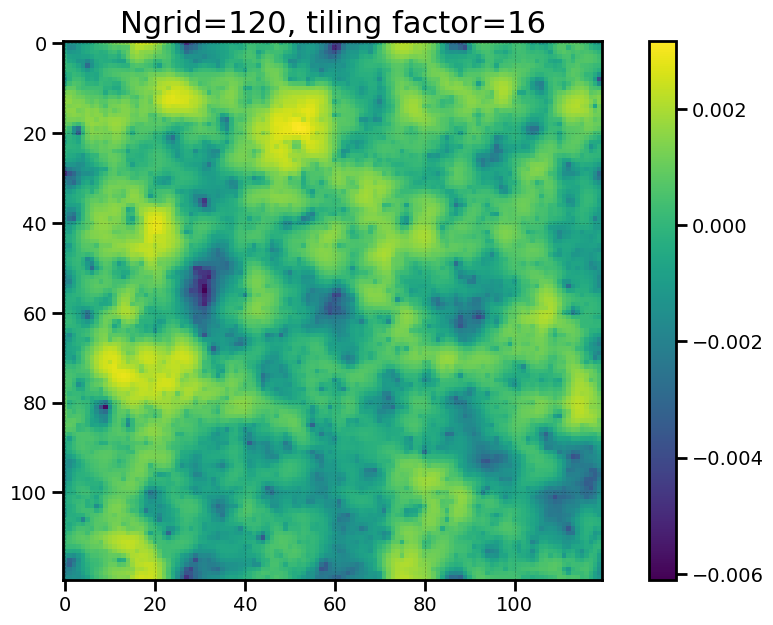

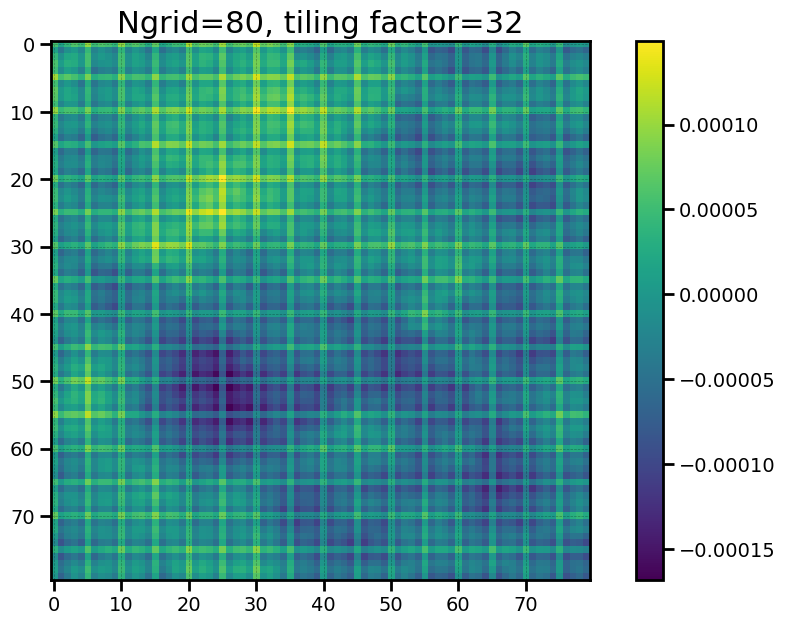

In [11]:
fig, ax = plt.subplots()

im = ax.imshow(snap200032[0][:,1,:])
fig.colorbar(im, ax=ax)
ax.set_title('Ngrid=104, tiling factor=32')

fig, ax = plt.subplots()
#more prominent small clumps

im = ax.imshow(snap2000[0][:,1,:])
fig.colorbar(im, ax=ax)
ax.set_title('Ngrid=120, tiling factor=16')


fig, ax = plt.subplots()

im = ax.imshow(snap80[0][:,1,:])
fig.colorbar(im, ax=ax)
ax.set_title('Ngrid=80, tiling factor=32')

Changing tiling factor for a simulation with identical boxsize and ngrid (400, 80). 

In [12]:
def data_getter(x):
    d32 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputtile/output32/lcdm_pk00' + str(x)+'_delta.dat')
    d40 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputtile/output40/lcdm_pk00' + str(x)+'_delta.dat')
    d48 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputtile/output48/lcdm_pk00' + str(x)+'_delta.dat')
    return d32, d40, d48


def snap_getter(x):
    d32 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputtile/output32/lcdm_snap00' + str(x)+'_phi.h5', 'data')
    d40 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputtile/output40/lcdm_snap00' + str(x)+'_phi.h5', 'data')
    d48 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputtile/output48/lcdm_snap00' + str(x)+'_phi.h5', 'data')
    return d32, d40, d48

num_files = 4

num_files = 4
delta32 = []
delta40 = []
delta48 = []
snap32 = []
snap40 = []
snap48 = []

for i in range(num_files):
    d32, d40, d48 = data_getter(i)
    delta32.append(d32)
    delta40.append(d40)
    delta48.append(d48)
    s32, s40, s48 = snap_getter(i)
    snap32.append(s32)
    snap40.append(s40)
    snap48.append(s48)


part_info400 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputtile/output32/lcdm_snap001_cdm.h5', 'part_info')
part_info800 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputtile/output40/lcdm_snap001_cdm.h5', 'part_info')
part_info160 = read_h5_file('/Users/Io_1/Desktop/gevolution/outputtile/output48/lcdm_snap001_cdm.h5', 'part_info')

print(part_info400, part_info800, part_info160)

[(1.48795166e-07, 0, 11066, b'part_simple')] [(7.61831251e-08, 0, 11020, b'part_simple')] [(4.40874566e-08, 0, 11171, b'part_simple')]


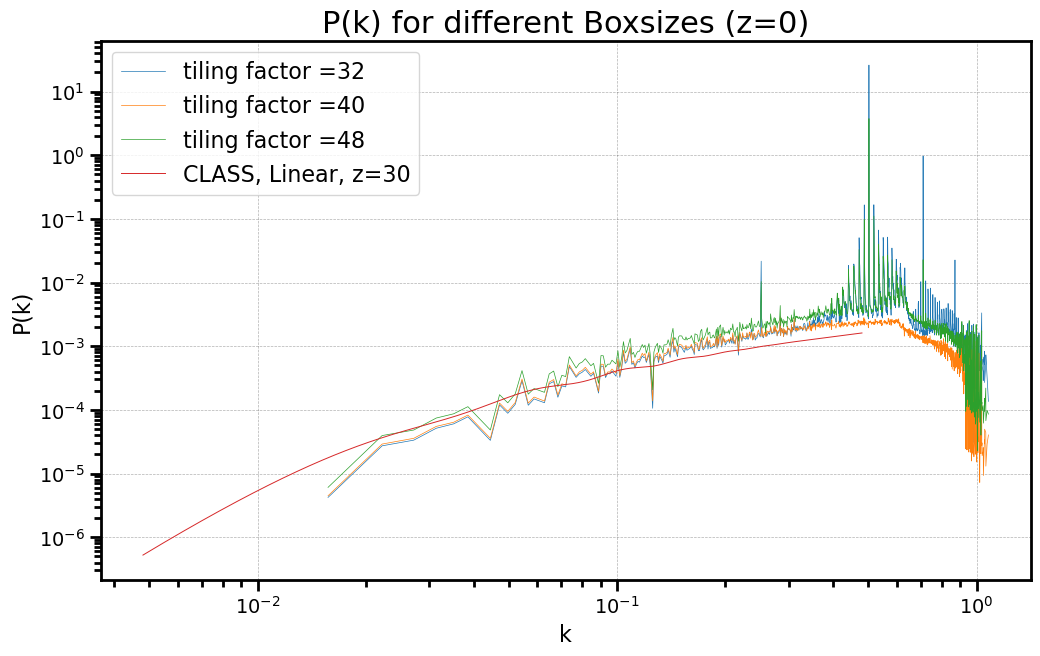

In [13]:
plt.loglog(delta32[0][:, 0], delta32[0][:, 1], label='tiling factor =32', linewidth=0.5)
#plt.loglog(delta32[1][:, 0], delta32[1][:, 1], label='tiling factor =32', linewidth=0.5)
#plt.loglog(delta32[2][:, 0], delta32[2][:, 1], label='tiling factor =32', linewidth=0.5)
#plt.loglog(delta32[3][:, 0], delta32[3][:, 1], label='tiling factor =32', linewidth=0.5)
plt.loglog(delta40[0][:, 0], delta40[0][:, 1], label='tiling factor =40 ', linewidth=0.5)
#plt.loglog(delta40[1][:, 0], delta40[1][:, 1], label='tiling factor =40 ', linewidth=0.5)
#plt.loglog(delta40[2][:, 0], delta40[2][:, 1], label='tiling factor =40 ', linewidth=0.5)
#plt.loglog(delta40[3][:, 0], delta40[3][:, 1], label='tiling factor =40 ', linewidth=0.5)
plt.loglog(delta48[0][:, 0], delta48[0][:, 1], label='tiling factor =48 ', linewidth=0.5)
#plt.loglog(delta48[1][:, 0], delta48[1][:, 1], label='tiling factor =48 ', linewidth=0.5)
#plt.loglog(delta48[2][:, 0], delta48[2][:, 1], label='tiling factor =48', linewidth=0.5)
#plt.loglog(delta48[3][:, 0], delta48[3][:, 1], label='tiling factor =48 ', linewidth=0.5)

plt.loglog(class_data[0][0,:], (1/(2*np.pi**2))*class_data[0][0,:]**3*class_data[0][1,:], linewidth=0.7, label='CLASS, Linear, z=30')

#plt.vlines(x=np.pi*120/2000, ymin=10e-7, ymax =10e3, label='nyquist2000', colors='blue')
#plt.vlines(x=np.pi*120/4000, ymin=10e-7, ymax =10e3, label='nyquist4000', colors='purple')
#plt.vlines(x=np.pi*120/8000, ymin=10e-7, ymax =10e3, label='nyquist8000', colors='red')

plt.title('P(k) for different Boxsizes (z=0)')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend()

Text(0.5, 1.0, 'Tiling factor=48')

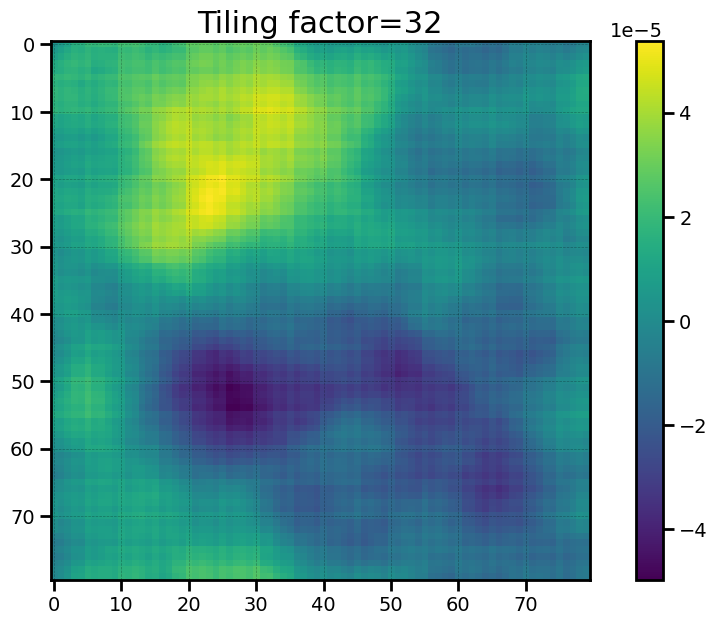

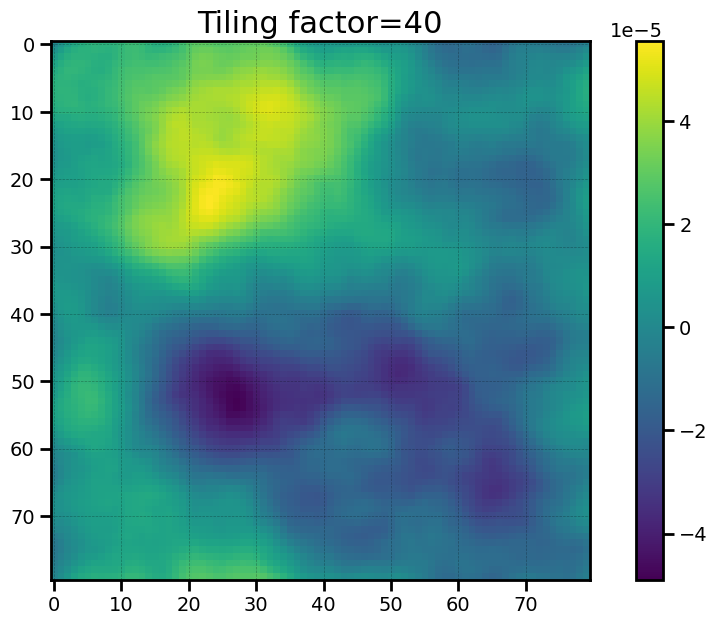

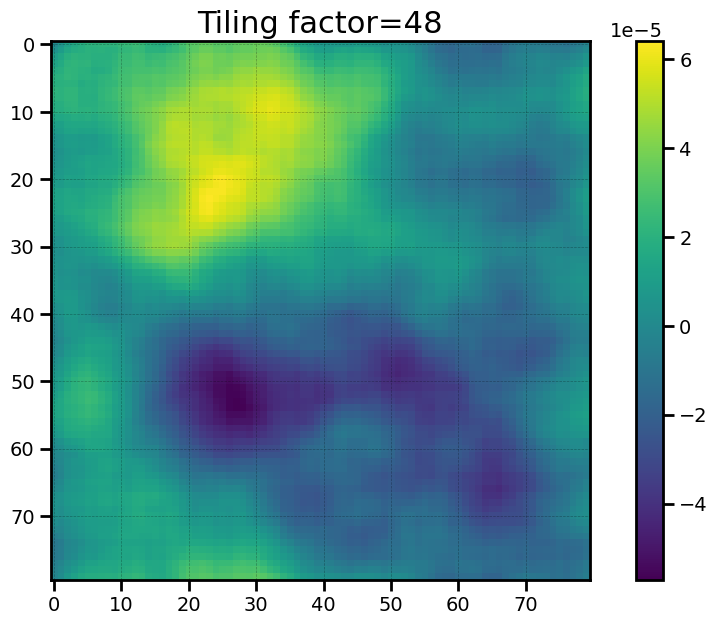

In [14]:
fig, ax = plt.subplots()

im = ax.imshow(snap32[0][:,1,:])
fig.colorbar(im, ax=ax)
ax.set_title('Tiling factor=32')

fig, ax = plt.subplots()

im = ax.imshow(snap40[0][:,1,:])
fig.colorbar(im, ax=ax)
ax.set_title('Tiling factor=40')

fig, ax = plt.subplots()

im = ax.imshow(snap48[0][:,1,:])
fig.colorbar(im, ax=ax)
ax.set_title('Tiling factor=48')

Two of these have identical resolution, different boxsize and the same tiling factor (64). The other has tilign factor 80 to show that increasing the tiling factor keeps the same result. 

In [15]:
def data_getter(x):
    d320= read_dat_file('/Users/Io_1/Desktop/gevolution/outputdefault/lcdm_pk00' + str(x)+'_delta.dat')
    d64= read_dat_file('/Users/Io_1/Desktop/gevolution/output400_64/lcdm_pk00' + str(x)+'_delta.dat')
    d80= read_dat_file('/Users/Io_1/Desktop/gevolution/output400_80/lcdm_pk00' + str(x)+'_delta.dat')
    return d320, d64, d80

num_files = 4
delta320= []
delta64= []
delta80= []

for i in range(num_files):
    d320, d64, d80 = data_getter(i)
    delta320.append(d320)
    delta64.append(d64)
    delta80.append(d80)

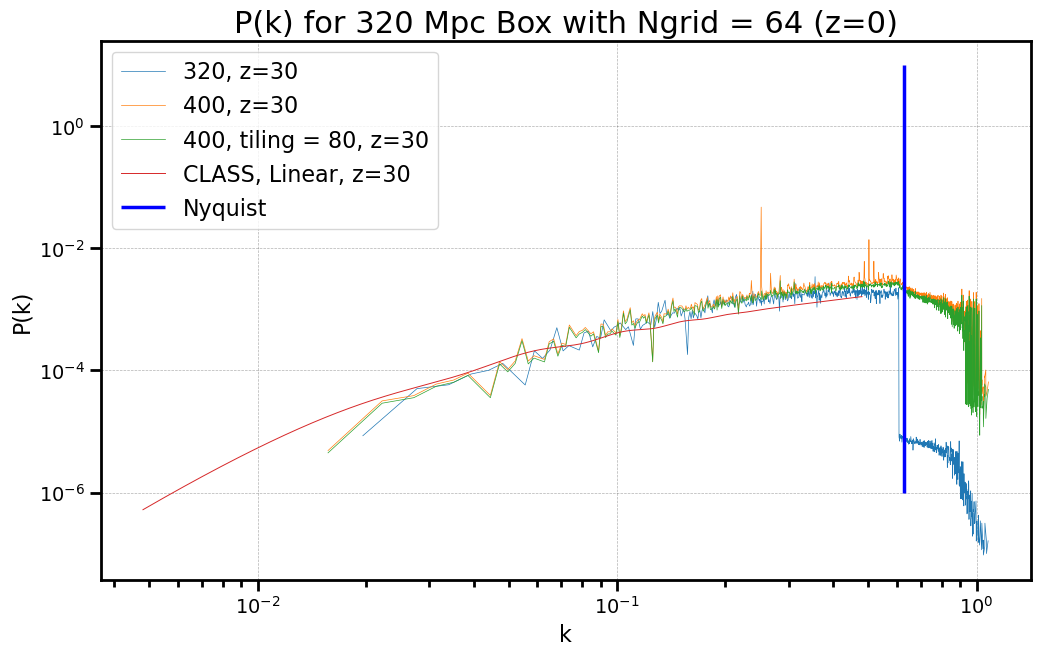

In [16]:
plt.loglog(delta320[0][:, 0], delta320[0][:, 1], label ='320, z=30', linewidth=0.5)
#plt.loglog(delta320[1][:, 0], delta320[1][:, 1], label ='320, z=10', linewidth=0.5)
#plt.loglog(delta320[2][:, 0], delta320[2][:, 1], label ='320, z=3', linewidth=0.5)
#plt.loglog(delta320[3][:, 0], delta320[3][:, 1], label ='320, z=0', linewidth=0.5)
plt.loglog(delta64[0][:, 0], delta64[0][:, 1], label ='400, z=30', linewidth=0.5)
#plt.loglog(delta64[1][:, 0], delta64[1][:, 1], label ='400,z=10', linewidth=0.5)
#plt.loglog(delta64[2][:, 0], delta64[2][:, 1], label ='400,z=3', linewidth=0.5)
#plt.loglog(delta64[3][:, 0], delta64[3][:, 1], label ='400,z=0', linewidth=0.5)
plt.loglog(delta80[0][:, 0], delta80[0][:, 1], label ='400, tiling = 80, z=30', linewidth=0.5)
#plt.loglog(delta80[2][:, 0], delta80[2][:, 1], label ='400, tiling = 80,z=3', linewidth=0.5)
#plt.loglog(delta80[3][:, 0], delta80[3][:, 1], label ='400, tiling = 80,z=0', linewidth=0.5)
#plt.loglog(delta80[1][:, 0], delta80[1][:, 1], label ='400, tiling = 80,z=10', linewidth=0.5)

plt.loglog(class_data[0][0,:], (1/(2*np.pi**2))*class_data[0][0,:]**3*class_data[0][1,:], linewidth=0.7, label='CLASS, Linear, z=30')
#plt.loglog(class_data[1][0,:], (1/(2*np.pi**2))*class_data[1][0,:]**3*class_data[1][1,:], linewidth=0.7, label='CLASS, Linear, z=10')
#plt.loglog(class_data[2][0,:], (1/(2*np.pi**2))*class_data[2][0,:]**3*class_data[2][1,:], linewidth=0.7, label='CLASS, Linear, z=3')

plt.vlines(x=np.pi*64/320, ymin=10e-7, ymax =10, label='Nyquist', colors='blue')

plt.title('P(k) for 320 Mpc Box with Ngrid = 64 (z=0)')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend()